## Clase de Pytorch

#### Cuda = GPU

## Pytorch

Libreria similar a numpy.

En vez de array, hay tensores

Pytorch permite diferenciación automática para el percetrón multicapa.

Genera un grafo interno de manera dinámica para tener en todo momento los gradientes de la función de activación.

## Numpy vs Pytorch

 array  vs tensor
 
 shape  vs size()
 
 size   vs nelement()
 
 dim()
          
 tensor.numpy() lo convierte a array de numpy
 
 from_numpy() para agarrar un array de numpy y usarlo de tensor
 

In [2]:
import torch

In [18]:
p = 1000 # Instancias del dataset
N = 9 # Variables de entrada
M = 3 # Variables de salida

s = 0.01
m = torch.randn (N + 1,M) # Genera números con distribución normal de dimensión N+1 x M
x = torch.rand (p, N + 1) # Números con distr. uniforme

x[:,-1] = 1
z = torch.mm (x,m) # Matrix multiply
w = torch.randn (N+1, M, requires_grad = True)

xn = x + s* torch.randn(p,N+1) #Genero un dataset con ruido

lr = 1e-4 #Learning rate
e,t = 1., 0

while e > 1e-3 and t<999:
    
    y = torch.mm(xn,w)
    
    error = (y-z).pow(2).sum()
    error.backward() # Revisa todo el error de los cálculos previos
    # dW = lr*np.dot(x.T,d) hace esto
    
    # with Especifica cosas en un bloque de código
    with torch.no_grad(): # no_grad no toma en cuenta los gradientes, no incorpora mas operaciones
    
        w -= lr * w.grad #actualiza los gradientes
        w.grad.zero_() # Aplica ceros a este gradiente, no genera un nuevo vector, por eso "_"
        
    e = error.item()/p # Genera el promedio para el error
    t+= 1
    
    if t%100 == 0:
        print(t,e)

print((torch.mm(x,w)-z).pow(2).mean().item())



100 0.20726690673828124
200 0.03491853332519531
300 0.012932048797607423
400 0.006151976585388183
500 0.003569514989852905
600 0.002558670520782471
700 0.0021617019176483152
800 0.0020057454109191895
900 0.0019444724321365356
1.3669255167769734e-05


#### El error del aprendizaje con ruido es mayor al error de los x verdaderos

### Problema de paridad con 8 bits

### Backpropagation de libro

Se puede probar con SGD (stocastic gradient descent)

O Mini-batch torch.randperm(p) me genera una permutacion de largo p


100 0.12083893775939941
200 0.08033987045288087
300 0.08020400047302247
400 0.08014755249023438
500 0.08011565208435059
600 0.0800949478149414
700 0.08008044242858886
800 0.08006973266601562
900 0.08006153106689454


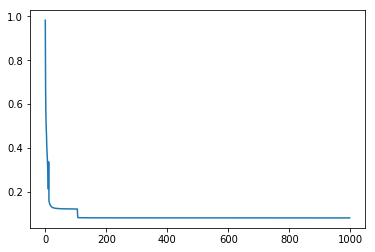

In [8]:
p = 100
N = 8
M = 1
H = N+1 # Capa oculta Probar cuando crece H
lr = 1e-2
bhsize = 10

"""Esto solo hace un dataset"""
x = torch.randn(p,N).sign() #matriz de signos de 100 x 8
z = torch.prod(x,dim=1).view(p,1) # z es el producto de todo x en la misma fila, queda un vector de largo p

"""Inicializo w1,w2, bias y error"""
w1 = torch.randn(N+1, H, requires_grad = True) 
w2 = torch.randn(H + 1,M , requires_grad = True)
bias = torch.ones(p,1)

e,t = 1.,0

E = []

"""Puedo probar agregando algo de ruido"""

while e>1e-3 and t<999:
    
    it = torch.randperm(p)
    
    for mb in range( 0, p, bhsize):
        i = it[mb:mb+bhsize]
    

        x_ = x[it]
        z_ = z[it]
        bias_ = bias[it]
        h = torch.cat((x_,bias_),dim=1).mm(w1).tanh() # Concatena dos tensores en tal dimensión
        y = torch.cat((h,bias_),dim=1).mm(w2).tanh() 
        error = (y-z_).pow(2).sum()

        """Genera los gradientes de w1 y w2"""
        error.backward()

        """No actualizo gradientes"""
        with torch.no_grad():
            """Actualiza los pesos"""
            w1 -= lr * w1.grad
            w2 -= lr * w2.grad

            """Resetea los gradientes"""
            w1.grad.zero_()
            w2.grad.zero_()

        
    e = error.item()/p
    t += 1
    E.append(e)
    if t%100 ==0: print(t,e)
       
    
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(E)
plt.show()





ssh usr@milagro.dc.uba.ar